In [20]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

In [21]:
image_directory = '/media/SSD2/cariotipos/MFISH_Dataset/MFISH_split/val/val2018/'
annotation_file = '/media/SSD2/cariotipos/MFISH_Dataset/MFISH_split/val/annotations/MFISH_chromosomes_val2018.json'

In [22]:
example_coco = COCO(annotation_file)

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


In [32]:
categories = example_coco.loadCats(example_coco.getCatIds())
category_names = [category['name'] for category in categories]
print('Custom COCO categories: \n{}\n'.format(' '.join(category_names)))

category_names = set([category['supercategory'] for category in categories])
print('Custom COCO supercategories: \n{}'.format(' '.join(category_names)))

Custom COCO categories: 
c01 c02 c03 c04 c05 c06 c07 c08 c09 c10 c11 c12 c13 c14 c15 c16 c17 c18 c19 c20 c21 c22 c23 c24

Custom COCO supercategories: 
chromosome


In [42]:
print(example_coco)
category_ids = example_coco.getCatIds(catNms=['c15'])
image_ids = example_coco.getImgIds(catIds=category_ids)
print(image_ids)
image_data = example_coco.loadImgs(image_ids[np.random.randint(0, len(image_ids))])[0]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 62, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 84, 85, 86, 88, 89, 90, 91, 92, 94, 95, 96, 97, 98, 99, 100]


In [43]:
image_data

{'coco_url': '',
 'date_captured': '2018-06-26 22:00:52.707600',
 'file_name': 'V2602.png',
 'flickr_url': '',
 'height': 517,
 'id': 25,
 'license': 1,
 'width': 645}

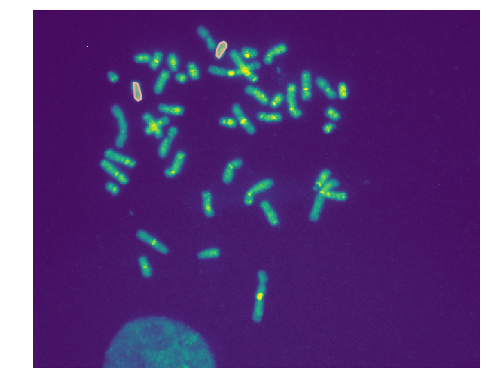

In [44]:
# load and display instance annotations
image = io.imread(image_directory + image_data['file_name'])
plt.imshow(image); plt.axis('off')
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
annotation_ids = example_coco.getAnnIds(imgIds=image_data['id'], catIds=category_ids, iscrowd=None)
annotations = example_coco.loadAnns(annotation_ids)
example_coco.showAnns(annotations)